## statsmodels
### 00 : Intro to STATSMODELS

- statistical models, hypothesis tests, and data exploration

In [170]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [184]:
# grab the data/load data
data = sm.datasets.get_rdataset("Guerry", "HistData").data

In [185]:
type(data)

pandas.core.frame.DataFrame

In [186]:
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [187]:
data.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [188]:
# Fit OLS regression use ln
# With R style formulas
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=data).fit()

In [189]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.90e-08
Time:                        14:47:43   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Susing numpy arrays
nob = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)

In [191]:
beta = [1,.1,.5] # coef
e = np.random.random(nobs) # error
y = np.dot(X, beta) + e

In [192]:
res_2 = sm.OLS(y, X).fit()

In [193]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     13.34
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           7.60e-06
Time:                        14:47:50   Log-Likelihood:                -17.276
No. Observations:                 100   AIC:                             40.55
Df Residuals:                      97   BIC:                             48.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4779      0.081     18.344      0.000       1.318       1.638
x1             0.1038      0.098      1.056      0.294      -0.091       0.299
x2             0.5519      0.107      5.150      0.000       0.339       0.765
==============================================================================
Omnibus:                       32.223   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.911
Skew:                          -0.005   Prob(JB):                       0.0521
Kurtosis:                       1.809   Cond. No.                         5.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

### 01 : Getting Started with statsmodels

In [203]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [204]:
# df = pd.read_csv("blah.csv")
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [205]:
vars = ["Department", "Lottery", "Literacy", "Wealth", "Region"]
df = df[vars]

In [206]:
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [207]:
df.info() #note you will see a missing variable under Region i.e. 85 vs 86

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  86 non-null     object
 1   Lottery     86 non-null     int64 
 2   Literacy    86 non-null     int64 
 3   Wealth      86 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [208]:
df = df.dropna() #i.e. drop that row
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  85 non-null     object
 1   Lottery     85 non-null     int64 
 2   Literacy    85 non-null     int64 
 3   Wealth      85 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [209]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', 
                 data=df, return_type='dataframe')

In [210]:
y.head()

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0


In [211]:
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


### Model Fit and Summary

In [212]:
# Describe Model
mod = sm.OLS(y, X)

# Fit Model; res is the result or output
res = mod.fit()

# Summarize Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.07e-05
Time:                        15:03:27   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
print(res.params)
print("==============")
print(res.rsquared) # or res.pvalues for p-value

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64
0.3379508691928822


### Diagnostics and spcification test

In [217]:
sm.stats.linear_rainbow(res) # will show F-stats, and P-Values

(0.8472339976156905, 0.6997965543621665)

In [33]:
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

eval_env: 1


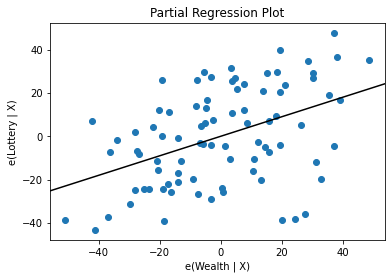

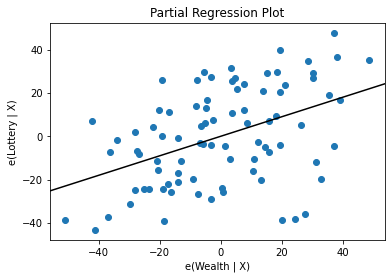

In [218]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                            data=df, obs_labels = False)

### 02 : Fitting Models Using R-style Formulas

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [219]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[["Lottery", "Literacy", "Wealth", "Region"]].dropna()
res = smf.ols(formula="Lottery ~ Literacy + Wealth + Region", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.07e-05
Time:                        15:46:31   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Categorical Variables

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Lottery   85 non-null     int64 
 1   Literacy  85 non-null     int64 
 2   Wealth    85 non-null     int64 
 3   Region    85 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [38]:
df.Region.unique()

array(['E', 'N', 'C', 'S', 'W'], dtype=object)

In [228]:
# To explicitly state Region is categorical
# Very useful to assigne those integers as catagorical value
res_c = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region)", data=df).fit()
res_c.summary() #as result with catergirca apprach res_c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.07e-05
Time:                        15:56:45   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.087      0.000      19.826      57.478
C(Region)[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
C(Region)[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
C(Region)[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
C(Region)[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy          -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth             0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# To remove variables - i.e. remove constant as no constant
res_nc = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region) - 1", data=df).fit()
res_nc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.07e-05
Time:                        15:56:47   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Region)[C]    38.6517      9.456      4.087      0.000      19.826      57.478
C(Region)[E]    23.2239     14.931      1.555      0.124      -6.501      52.949
C(Region)[N]    28.6347     13.127      2.181      0.032       2.501      54.769
C(Region)[S]    34.1034     10.370      3.289      0.002      13.459      54.748
C(Region)[W]    28.5604     10.018      2.851      0.006       8.616      48.505
Literacy        -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth           0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# Interactions: Matrix
res_int1 = smf.ols(formula="Lottery ~ Literacy:Wealth -1", data=df).fit()
print(res_int1.params)

Literacy:Wealth    0.018176
dtype: float64


In [248]:
# Interactions individual cols
res_int2 = smf.ols(formula="Lottery ~ Literacy*Wealth - 1", data=df).fit()
print(res_int2.params)

Literacy           0.427386
Wealth             1.080987
Literacy:Wealth   -0.013609
dtype: float64


In [246]:
# Functions
res = smf.ols(formula="Lottery ~ np.log(Literacy)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           0.000144
Time:                        17:05:07   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.6091     18.374  

In [249]:
def log_plus_1(x):
    return np.log(x) + 1.

In [250]:
# Functions
res = smf.ols(formula="Lottery ~ log_plus_1(Literacy)", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           0.000144
Time:                        17:08:25   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              136.0031     23.454      5.799      0.000      89.354     182.652
log_plus_1(Literacy)   -20.3940      5.116     -3.986      0.000     -30.570     -10.218
==============================================================================
Omnibus:                        8.907   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                3.299
Skew:                           0.108   Prob(JB):                        0.192
Kurtosis:                       2.059   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 03 : Ordinary Least Squares Regression

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [253]:
# Fake Data
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)

In [258]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [259]:
# Model fit and Summary
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.437e+06
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          1.24e-245
Time:                        17:15:28   Log-Likelihood:                -131.47
No. Observations:                 100   AIC:                             268.9
Df Residuals:                      97   BIC:                             276.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9481      0.269      3.524      0.001       0.414       1.482
x1             0.0405      0.124      0.326      0.745      -0.206       0.287
x2            10.0073      0.012    831.696      0.000       9.983      10.031
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.431
Skew:                          -0.147   Prob(JB):                        0.806
Kurtosis:                       2.872   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
print("R2: ", res.rsquared )

R2:  0.9999910791623945


### OLS non-linear curve but linear in parameters

In [261]:
# Fake Data 2
nsample = 100
sig = 0.5
x = np.linspace(0,20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) # Adds noise

In [262]:
res_2 = sm.OLS(y, X).fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     483.6
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           8.70e-58
Time:                        17:19:17   Log-Likelihood:                -66.878
No. Observations:                 100   AIC:                             141.8
Df Residuals:                      96   BIC:                             152.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5151      0.018     28.252      0.000       0.479       0.551
x2             0.4970      0.070      7.053      0.000       0.357       0.637
x3            -0.0215      0.002    -13.399      0.000      -0.025      -0.018
const          4.9465      0.118     41.839      0.000       4.712       5.181
==============================================================================
Omnibus:                        2.638   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.323
Skew:                           0.373   Prob(JB):                        0.313
Kurtosis:                       3.028   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
print("Parameters: ", res_2.params)
print("Std Errors: ", res_2.bse)
print("Pred Values: ", res_2.predict())
print("R Squared", res_2.rsquared)

Parameters:  [ 0.51514159  0.4969669  -0.02146912  4.94652663]
Std Errors:  [0.01823382 0.07046293 0.00160224 0.11822806]
Pred Values:  [ 4.40979871  4.65607931  4.89655171  5.12732507  5.34483179  5.54597257
  5.72824251  5.88983296  6.02970513  6.14763228  6.24420899  6.32082699
  6.37961847  6.42336945  6.45540642  6.47946104  6.49951834  6.51965471
  6.543872    6.57593482  6.6192174   6.67656634  6.75018483  6.84154306
  6.95131838  7.07936779  7.22473375  7.38568311  7.55977761  7.74397305
  7.93474311  8.12822281  8.32036563  8.50710821  8.68453551  8.84904013
  8.99746899  9.12725159  9.23650458  9.32410833  9.38975249  9.43394861
  9.45800932  9.46399498  9.45462981  9.43319116  9.40337616  9.36915136
  9.3345914   9.30371328  9.28031295  9.26781096  9.26911329  9.28649319
  9.32149869  9.37488965  9.44660685  9.5357744   9.64073539  9.75911921
  9.88793806 10.02370842 10.16259276 10.30055559 10.43352766 10.55757141
 10.66904116 10.76473139 10.84200709 10.89891098 10.9342431  

In [264]:
def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

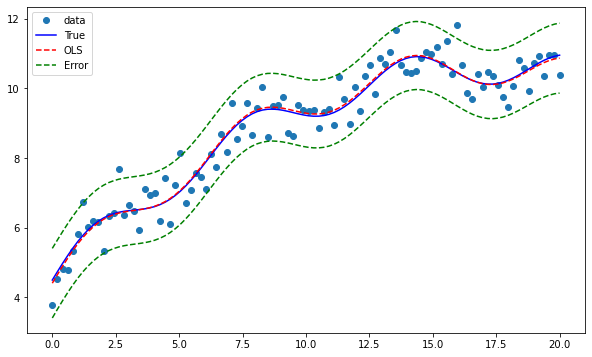

In [265]:
plot_compare(res_2)

### OLS with Dummy Variables

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [267]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] =1
groups[40:] = 2
dummy = pd.get_dummies(groups).values
x = np.linspace(0,20,nsample)
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [268]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [269]:
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     702.6
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.07e-38
Time:                        17:58:46   Log-Likelihood:                -62.661
No. Observations:                  50   AIC:                             133.3
Df Residuals:                      46   BIC:                             141.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8310      0.058     14.431      0.000       0.715       0.947
x2             4.2850      0.547      7.836      0.000       3.184       5.386
x3            -0.6670      0.891     -0.749      0.458      -2.460       1.126
const         10.4841      0.298     35.168      0.000       9.884      11.084
==============================================================================
Omnibus:                        1.275   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.230
Skew:                           0.356   Prob(JB):                        0.541
Kurtosis:                       2.714   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

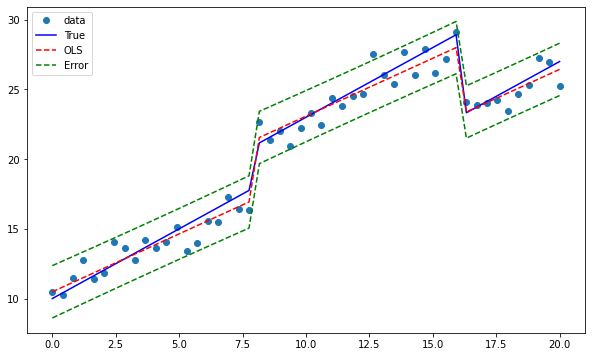

In [62]:
plot_compare(res)

### 05 : Generalized Least Squares

In [1]:
#conda update statsmodels
#Ref Source:  https://www.statsmodels.org/dev/examples/notebooks/generated/gls.html
import numpy as np

import statsmodels.api as sm

In [2]:
#The Longley dataset is a time series dataset:
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
print(data.exog.head())

   const  GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0    1.0     83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1    1.0     88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2    1.0     88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3    1.0     89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4    1.0     96.2  328975.0  2099.0  3099.0  112075.0  1951.0


Let's assume that the data is heteroskedastic and that we know the nature of the heteroskedasticity. We can then define sigma and use it to give us a GLS model

First we will obtain the residuals from an OLS fit

In [3]:
ols_resid = sm.OLS(data.endog, data.exog).fit().resid

In [4]:
ols_resid

0     267.340030
1     -94.013942
2      46.287168
3    -410.114622
4     309.714591
5    -249.311215
6    -164.048956
7     -13.180357
8      14.304773
9     455.394095
10    -17.268927
11    -39.055043
12   -155.549974
13    -85.671308
14    341.931514
15   -206.757825
dtype: float64

Assume that the error terms follow an AR(1) process with a trend:

$\epsilon_i = \beta_0 + \rho\epsilon_{i-1} + \eta_i$

where $\eta \sim N(0,\Sigma^2)$

and that $\rho$ is simply the correlation of the residual a consistent estimator for rho is to regress the residuals on the lagged residuals

In [9]:
resid_fit = sm.OLS(
    np.asarray(ols_resid)[1:], sm.add_constant(np.asarray(ols_resid)[:-1])
).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-1.4390229839814361
0.1737844478859629


In [10]:
#While we do not have strong evidence that the errors follow an AR(1) process we continue
rho = resid_fit.params[1]

In [11]:
print(rho)

-0.36342949087846055


As we know, an AR(1) process means that near-neighbors have a stronger relation so we can give this structure by using a toeplitz matrix

In [12]:
from scipy.linalg import toeplitz

toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [13]:
order = toeplitz(range(len(ols_resid)))

In [14]:
print(order)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [ 1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 2  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 3  2  1  0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 4  3  2  1  0  1  2  3  4  5  6  7  8  9 10 11]
 [ 5  4  3  2  1  0  1  2  3  4  5  6  7  8  9 10]
 [ 6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9]
 [ 7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8]
 [ 8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7]
 [ 9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6]
 [10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5]
 [11 10  9  8  7  6  5  4  3  2  1  0  1  2  3  4]
 [12 11 10  9  8  7  6  5  4  3  2  1  0  1  2  3]
 [13 12 11 10  9  8  7  6  5  4  3  2  1  0  1  2]
 [14 13 12 11 10  9  8  7  6  5  4  3  2  1  0  1]
 [15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]]


so that our error covariance structure is actually rho**order which defines an autocorrelation structure

In [15]:
sigma = rho ** order
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
gls_results = gls_model.fit()

In [16]:
gls_results.summary()

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     724.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.48e-11
Time:                        09:58:44   Log-Likelihood:                -107.50
No. Observations:                  16   AIC:                             229.0
Df Residuals:                       9   BIC:                             234.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.798e+06   6.71e+05     -5.663      0.000   -5.32e+06   -2.28e+06
GNPDEFL      -12.7656     69.431     -0.184      0.858    -169.829     144.298
GNP           -0.0380      0.026     -1.448      0.182      -0.097       0.021
UNEMP         -2.1869      0.382     -5.719      0.000      -3.052      -1.322
ARMED         -1.1518      0.165     -6.970      0.000      -1.526      -0.778
POP           -0.0681      0.176     -0.386      0.709      -0.467       0.331
YEAR        1993.9529    342.635      5.819      0.000    1218.860    2769.046
==============================================================================
Omnibus:                        1.365   Durbin-Watson:                   2.534
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.885
Skew:                           0.209   Prob(JB):                        0.642
Kurtosis:                       1.926   Cond. No.                     5.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Of course, the exact rho in this instance is not known so it it might make more sense to use feasible gls, which currently only has experimental support.

We can use the GLSAR model with one lag, to get to a similar result:

In [17]:
glsar_model = sm.GLSAR(data.endog, data.exog, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                 TOTEMP   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           6.09e-09
Time:                        09:59:50   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.468e+06   8.72e+05     -3.979      0.0

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Comparing gls and glsar results, we see that there are some small differences in the parameter estimates and the resulting standard errors of the parameter estimate. This might be do to the numerical differences in the algorithm, e.g. the treatment of initial conditions, because of the small number of observations in the longley dataset.

In [24]:
print(gls_results.params)
print(glsar_results.params)
print("==================================")
print(gls_results.bse)
print(glsar_results.bse)

const     -3.797855e+06
GNPDEFL   -1.276565e+01
GNP       -3.800132e-02
UNEMP     -2.186949e+00
ARMED     -1.151776e+00
POP       -6.805356e-02
YEAR       1.993953e+03
dtype: float64
const     -3.467961e+06
GNPDEFL    3.455678e+01
GNP       -3.434101e-02
UNEMP     -1.962144e+00
ARMED     -1.001973e+00
POP       -9.780460e-02
YEAR       1.823183e+03
dtype: float64
const      670688.699308
GNPDEFL        69.430807
GNP             0.026248
UNEMP           0.382393
ARMED           0.165253
POP             0.176428
YEAR          342.634628
dtype: float64
const      871584.051695
GNPDEFL        84.733715
GNP             0.032803
UNEMP           0.480545
ARMED           0.211384
POP             0.224774
YEAR          445.828748
dtype: float64


### 6 : Quantile Regresson

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


### Least Abosulte Deviation

In [20]:
model = smf.quantreg('foodexp~income', data)
res = model.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Mon, 29 Aug 2022   No. Observations:                  235
Time:                        10:11:54   Df Residuals:                      233
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586
==============================================================================

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualize Results

In [21]:
quantiles = np.arange(.05, .96, .1)
def fit_models(q):
    res = model.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()

models = [fit_models(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q","a","b","lb","ub"])

ols = smf.ols('foodexp~income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols_dict = dict(a=ols.params['Intercept'],
                b=ols.params['income'], 
                lb = ols_ci[0],
                ub = ols_ci[1])
print(models)
print(ols_dict)

      q           a         b        lb        ub
0  0.05  124.880096  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033434  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.4753885237057, 'b': 0.48517842367692354, 'lb': 0.4568738130184233, 'ub': 0.5134830343354237}


### First Plot
- Best fit line for 10 quantile regression models to the least squares fit.

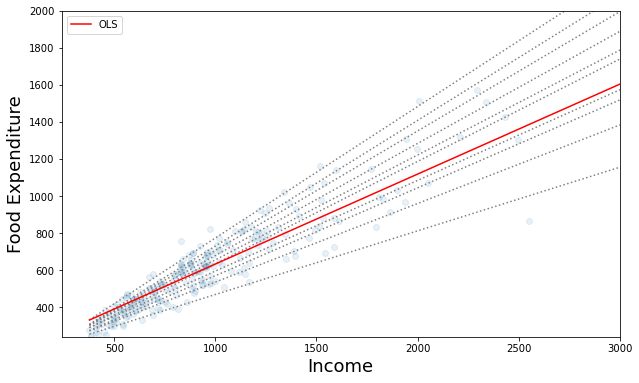

In [23]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(10,6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols_dict['a'], ols_dict['b'])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.1)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Food Expenditure', fontsize=18);

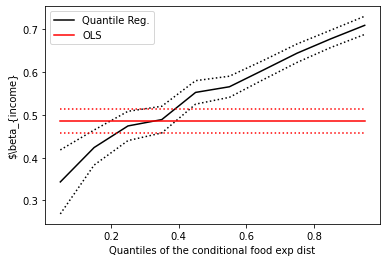

In [24]:
n = models.shape[0]
# QUANTILE REG
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
# OLS
p4 = plt.plot(models.q, [ols_dict['b']] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols_dict['lb']] * n, color="red", linestyle="dotted")
p6 = plt.plot(models.q, [ols_dict['ub']] * n, color="red", linestyle="dotted")
plt.ylabel(r'$\beta_{income}')
plt.xlabel("Quantiles of the conditional food exp dist")
plt.legend();

### 07 : Recursive Least Squares
**Copper Dataset**

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
print(sm.datasets.copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



In [27]:
data = sm.datasets.copper.load_pandas().data

In [28]:
data.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


In [29]:
data.columns

Index(['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX', 'TIME'],
      dtype='object')

In [30]:
data.index = pd.date_range("1951-01-01", "1975-01-01", freq="AS")
endog = data['WORLDCONSUMPTION']
exog = sm.add_constant(data[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX']])

In [31]:
model = sm.RecursiveLS(endog, exog)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Mon, 29 Aug 2022   R-squared:                       0.965
Time:                        10:50:11   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401     15.853      0.000    1.06e+04    1.36e+04
ALUMPRICE         70.4146     32.678      2.155      0.031       6.367     134.462
INVENTORYINDEX   311.7330   2130.084      0.146      0.884   -3863.155    4486.621
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.14   Prob(JB):                         0.43
Heteroskedasticity (H):               3.38   Skew:                            -0.67
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

The recursive coefficients are available in the recursive_coefficients attribute. Alternatively, plots can generated using the plot_recursive_coefficient method.

In [32]:
res.recursive_coefficients.filtered[0]

array([ 2.88890087e+00,  4.94795049e+00,  1.55841803e+03,  1.95843327e+03,
       -5.14749580e+04, -4.16894964e+03, -2.25261353e+03, -4.46559075e+02,
       -5.28839796e+03, -6.94231937e+03, -7.84608905e+03, -6.64315123e+03,
       -6.27411017e+03, -7.27201697e+03, -6.31902649e+03, -5.82223930e+03,
       -6.25630904e+03, -6.73740447e+03, -6.47742842e+03, -5.99590748e+03,
       -6.45080679e+03, -6.02292167e+03, -5.25835154e+03, -5.32089137e+03,
       -6.56237195e+03])

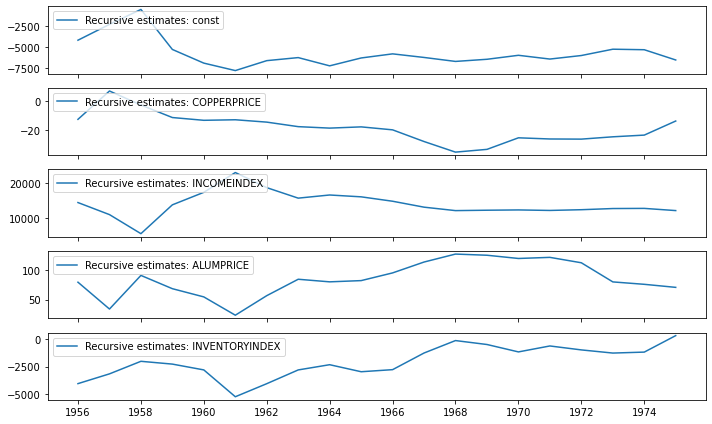

In [43]:
res.plot_recursive_coefficient(range(model.k_exog), alpha=None, figsize=(10,6));

The `CUSUM` statistic is available in the cusum attribute, but usually it is more convenient to visually check for parameter stability using the plot_cusum method. In the plot below, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.

In [33]:
res.cusum

array([ 0.69971508,  0.65841244,  1.24629674,  2.05476032,  2.39888919,
        3.1786198 ,  2.67244672,  2.01783215,  2.46131747,  2.05268638,
        0.95054336, -1.04505546, -2.55465286, -2.29908152, -1.45289493,
       -1.95353994, -1.35046621,  0.15789829,  0.6328653 , -1.48184586])

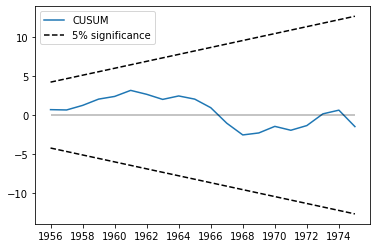

In [34]:
res.plot_cusum();

Another related statistic is the CUSUM of squares. It is available in the `cusum_squares` attribute, but it is similarly more convenient to check it visually, using the `plot_cusum_squares` method. In the plot below, the `CUSUM` of squares statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.

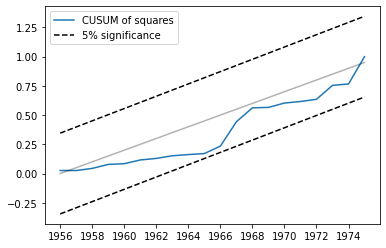

In [50]:
res.plot_cusum_squares();

### 08 : Recursive Least Squares
**Quantity Theory of Money**
The quantity theory of money suggests that “a given change in the rate of change in the quantity of money induces … an equal change in the rate of price inflation” (Lucas, 1980). Following Lucas, we examine the relationship between double-sided exponentially weighted moving averages of money growth and CPI inflation. Although Lucas found the relationship between these variables to be stable, more recently it appears that the relationship is unstable; see e.g. Sargent and Surico (2010).

In [35]:
#!pip install pandas-datareader

In [36]:
from pandas_datareader.data import DataReader

In [37]:
start = "1959-12-01"
end = "2015-01-01"
m2 = DataReader("M2SL", "fred", start=start, end=end)
cpi = DataReader("CPIAUCSL", "fred", start=start, end=end)

In [38]:
def ewma(series, beta, n_window): #ewma is Exponentially Weighted Moving Avg
    nobs = len(series)
    scalar = (1 - beta) / (1 + beta)
    ma = []
    k = np.arange(n_window, 0, -1)
    weights = np.r_[beta ** k, 1, beta ** k[::-1]]
    for t in range(n_window, nobs - n_window):
        window = series.iloc[t - n_window : t + n_window + 1].values
        ma.append(scalar * np.sum(weights * window))
    return pd.Series(ma, name=series.name, index=series.iloc[n_window:-n_window].index)


m2_ewma = ewma(np.log(m2["M2SL"].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)
cpi_ewma = ewma(
    np.log(cpi["CPIAUCSL"].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4
)

After constructing the moving averages using the `beta=0.95` filter of Lucas (with a window of 10 years on either side), we plot each of the series below. Although they appear to move together prior for part of the sample, after 1990 they appear to diverge.

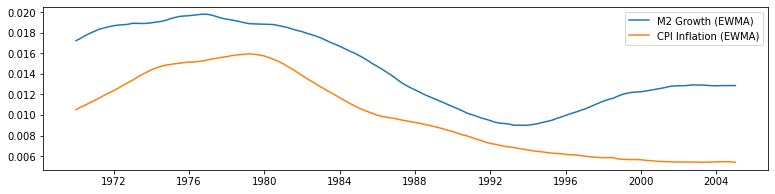

In [39]:
fig, ax = plt.subplots(figsize=(13, 3))

ax.plot(m2_ewma, label="M2 Growth (EWMA)")
ax.plot(cpi_ewma, label="CPI Inflation (EWMA)")
ax.legend()

In [41]:
endog = cpi_ewma
exog = sm.add_constant(m2_ewma)
exog.columns = ["const", "M2"]

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:               CPIAUCSL   No. Observations:                  141
Model:                    RecursiveLS   Log Likelihood                 692.884
Date:                Mon, 29 Aug 2022   R-squared:                       0.813
Time:                        11:11:30   AIC                          -1381.769
Sample:                    01-01-1970   BIC                          -1375.871
                         - 01-01-2005   HQIC                         -1379.372
Covariance Type:            nonrobust   Scale                            0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.001     -6.014      0.000      -0.004      -0.002
M2             0.9128      0.037     24.603      0.000       0.840       0.986
===================================================================================
Ljung-Box (L1) (Q):                 138.24   Jarque-Bera (JB):                18.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

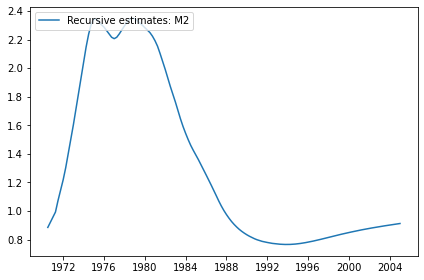

In [44]:
res.plot_recursive_coefficient(1, alpha=None);

The `CUSUM` plot now shows substantial deviation at the 5% level, suggesting a rejection of the null hypothesis of parameter stability.

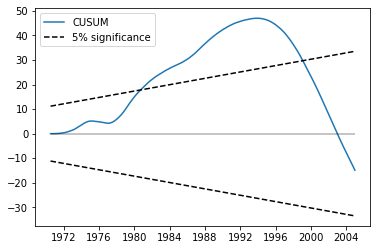

In [45]:
res.plot_cusum();

Similarly, the `CUSUM of squares` shows substantial deviation at the 5% level, also suggesting a rejection of the null hypothesis of parameter stability.

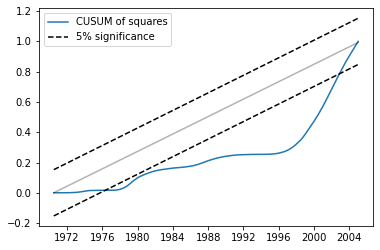

In [46]:
res.plot_cusum_squares();

### Linear restrictions and formulas
#### Linear restrictions
It is not hard to implement linear restrictions, using the constraints parameter in constructing the model.

In [50]:
endog = data["WORLDCONSUMPTION"]
exog = sm.add_constant(
    data[["COPPERPRICE", "INCOMEINDEX", "ALUMPRICE", "INVENTORYINDEX"]]
)

mod = sm.RecursiveLS(endog, exog, constraints="COPPERPRICE = ALUMPRICE")
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -143.750
Date:                Mon, 29 Aug 2022   R-squared:                       0.989
Time:                        11:15:34   AIC                            295.500
Sample:                    01-01-1951   BIC                            300.376
                         - 01-01-1975   HQIC                           296.853
Covariance Type:            nonrobust   Scale                       137155.014
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4839.4893   2412.410     -2.006      0.045   -9567.726    -111.253
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308     16.738      0.000    9847.002    1.25e+04
ALUMPRICE          5.9797     12.704      0.471      0.638     -18.921      30.880
INVENTORYINDEX   241.3447   2298.951      0.105      0.916   -4264.516    4747.205
===================================================================================
Ljung-Box (L1) (Q):                   6.27   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.01   Prob(JB):                         0.41
Heteroskedasticity (H):               1.75   Skew:                            -0.63
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+17. Standard errors may be unstable.
"""

#### Formula
One could fit the same model using the class method from_formula.

In [53]:
mod = sm.RecursiveLS.from_formula(
    "WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX",
    data,
    constraints="COPPERPRICE = ALUMPRICE",
)
res = mod.fit()
res.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -143.750
Date:                Mon, 29 Aug 2022   R-squared:                       0.989
Time:                        11:16:11   AIC                            295.500
Sample:                    01-01-1951   BIC                            300.376
                         - 01-01-1975   HQIC                           296.853
Covariance Type:            nonrobust   Scale                       137155.014
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4839.4893   2412.410     -2.006      0.045   -9567.726    -111.253
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308     16.738      0.000    9847.002    1.25e+04
ALUMPRICE          5.9797     12.704      0.471      0.638     -18.921      30.880
INVENTORYINDEX   241.3447   2298.951      0.105      0.916   -4264.516    4747.205
===================================================================================
Ljung-Box (L1) (Q):                   6.27   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.01   Prob(JB):                         0.41
Heteroskedasticity (H):               1.75   Skew:                            -0.63
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+17. Standard errors may be unstable.
"""

### 09 : Rolling Regression

Rolling OLS applies OLS across a fixed windows of observations and then rolls (moves or slides) the window across the data set. They key parameter is `window` which determines the number of observations used in each OLS regression. By default, `RollingOLS` drops missing values in the window and so will estimate the model using the available data points.

Estimated values are aligned so that models estimated using data points `i+1, i+2,  ...i+window` are stored in location .

Start by importing the modules that are used in this notebook.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

`pandas-datareader` is used to download data from Ken [French’s website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). The two data sets downloaded are the 3 Fama-French factors and the 10 industry portfolios. Data is available from 1926.

The data are monthly returns for the factors or industry portfolios.

In [55]:
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")[0]
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.38,-2.73,0.22
1926-08,2.64,-1.47,4.14,0.25
1926-09,0.36,-1.39,0.12,0.23
1926-10,-3.24,-0.13,0.65,0.32
1926-11,2.53,-0.16,-0.38,0.31


In [56]:
industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")[0]
industries.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


The first model estimated is a rolling version of the CAPM that regresses the excess return of Technology sector firms on the excess return of the market.

The window is 60 months, and so results are available after the first 60 (`window`) months. The first 59 (`window - 1`) estimates are all `nan` filled.

In [60]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()

,const,Mkt-RF
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [61]:
params.iloc[57:62]

,const,Mkt-RF
58,NaN,NaN
59,NaN,NaN
60,0.876155,1.399240
61,0.879936,1.406578
62,0.953169,1.408826


In [62]:
params.tail()

,const,Mkt-RF
1148,0.641942,1.049297
1149,0.610783,1.049532
1150,0.514221,1.073614
1151,0.431310,1.075806
1152,0.494172,1.074061


We next plot the market loading along with a 95% point-wise confidence interval. The `alpha=False` omits the constant column, if present.

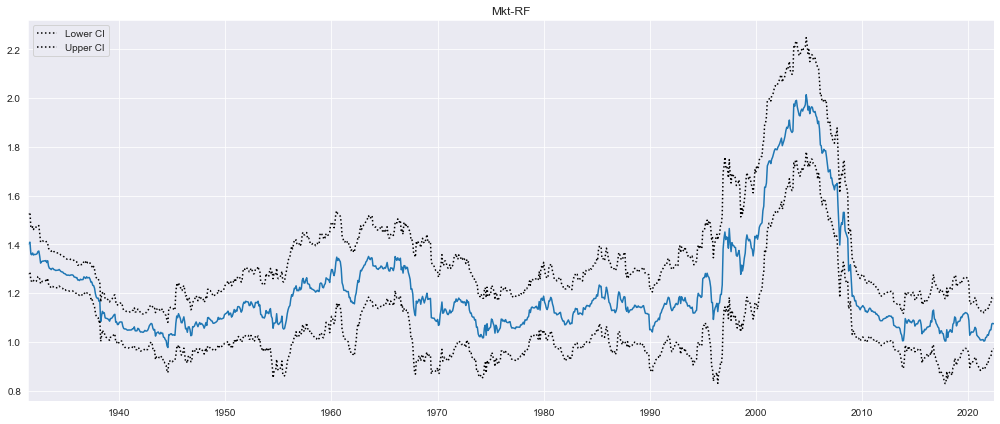

In [65]:
fig = rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(14, 6))

Next, the model is expanded to include all three factors, the excess market, the size factor and the value factor.

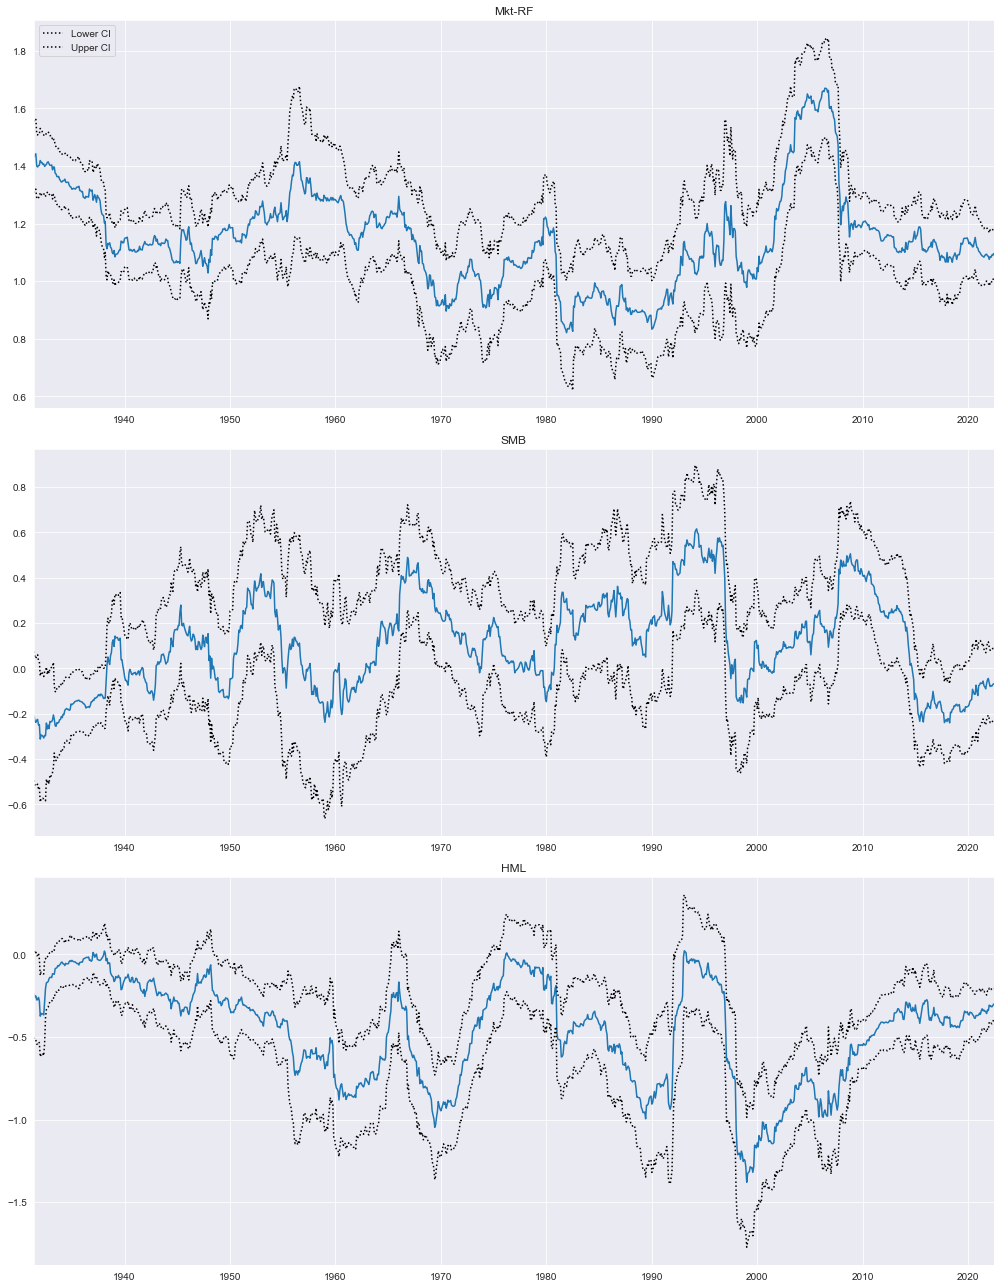

In [66]:
exog_vars = ["Mkt-RF", "SMB", "HML"] # three graphs woud be seen
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))

#### Formulas
`RollingOLS` and `RollingWLS` both support model specification using the formula interface. The example below is equivalent to the 3-factor model estimated previously. Note that one variable is renamed to have a valid Python variable name.

In [67]:
joined = pd.concat([factors, industries], axis=1)
joined["Mkt_RF"] = joined["Mkt-RF"]
mod = RollingOLS.from_formula("HiTec ~ Mkt_RF + SMB + HML", data=joined, window=60)
rres = mod.fit()
rres.params.tail()

,Intercept,Mkt_RF,SMB,HML
Date,,,,
2022-02,0.563173,1.082539,-0.083691,-0.318981
2022-03,0.539433,1.080047,-0.079232,-0.315718
2022-04,0.503399,1.088654,-0.081392,-0.322231
2022-05,0.490876,1.087305,-0.075584,-0.316113
2022-06,0.510452,1.094293,-0.071446,-0.304956


**RollingWLS: Rolling Weighted Least Squares**
The rolling module also provides RollingWLS which takes an optional weights input to perform rolling weighted least squares. It produces results that match WLS when applied to rolling windows of data.

**Fit Options**
Fit accepts other optional keywords to set the covariance estimator. Only two estimators are supported, `nonrobust` (the classic OLS estimator) and `HC0` which is White’s heteroskedasticity robust estimator.

You can set `params_only=True` to only estimate the model parameters. This is substantially faster than computing the full set of values required to perform inference.

Finally, the parameter `reset` can be set to a positive integer to control estimation error in very long samples. `RollingOLS` avoids the full matrix product when rolling by only adding the most recent observation and removing the dropped observation as it rolls through the sample. Setting `reset` uses the full inner product every reset periods. In most applications this parameter can be omitted.

In [68]:
%timeit rols.fit()
%timeit rols.fit(params_only=True)

411 ms ± 47.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
93.5 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Expanding Sample**
It is possible to expand the sample until sufficient observations are available for the full window length. In this example, we start once we have 12 observations available, and then increase the sample until we have 60 observations available. The first non-`nan` value is computed using 12 observations, the second 13, and so on. All other estimates are computed using 60 observations.

In [69]:
res = RollingOLS(endog, exog, window=60, min_nobs=12, expanding=True).fit()
res.params.iloc[10:15]

,const,Mkt-RF,SMB,HML
Date,,,,
1927-05,NaN,NaN,NaN,NaN
1927-06,1.609958,0.989809,1.293225,-0.397946
1927-07,1.281263,1.288831,0.725477,-0.483447
1927-08,1.313895,1.294528,0.744893,-0.500103
1927-09,1.458561,1.279002,1.159757,-0.546698


In [70]:
res.nobs[10:15]

Date
1927-05     0
1927-06    12
1927-07    13
1927-08    14
1927-09    15
Freq: M, dtype: int32

Source of Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html

### 10 : Regression Diagnostics

In [71]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [74]:
res = smf.ols("Lottery~Literacy + np.log(Pop1831)", data=df).fit()

In [75]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.90e-08
Time:                        11:58:16   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality of residuals
**Jarque-Bera Test:**

In [80]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis" ]

In [81]:
test = sms.jarque_bera(res.resid)
lzip(name, test)

[('Jarque-Bera', 3.3936080248431755),
 ('Chi^2 two-tail prob.', 0.18326831231663288),
 ('Skew', -0.48658034311223436),
 ('Kurtosis', 3.003417757881633)]

**Influence Tests**

In [82]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [83]:
test_class = OLSInfluence(res)

In [84]:
test_class.dfbeta[5:,:]

array([[ 8.26794653e-01, -9.37228508e-03, -3.91782694e-02],
       [-4.60565242e-01, -6.00836231e-03,  1.07905336e-01],
       [ 2.20296666e+00, -8.83371102e-03, -2.94410442e-01],
       [-3.09677967e+00, -1.44344868e-02,  5.88879087e-01],
       [-6.94207982e-01,  8.22842167e-04,  1.03706847e-01],
       [ 4.10842584e-01, -1.11761663e-02,  7.29888204e-02],
       [-1.89562753e-01,  2.08460190e-03, -6.30431760e-02],
       [ 2.38248735e+00, -6.58585145e-03, -3.89952698e-01],
       [ 4.44134010e+00, -7.37883826e-03, -6.57505666e-01],
       [ 3.65734696e-02, -2.06183483e-03,  3.90285143e-02],
       [ 1.48071908e-01,  4.65456319e-05, -2.83829919e-02],
       [-4.66538011e+00,  2.34268272e-02,  5.91701800e-01],
       [ 2.88977165e+00, -2.35317798e-02, -2.90569539e-01],
       [-6.22764720e-02,  1.28974407e-03,  5.15640285e-03],
       [-8.19834682e+00, -3.43559449e-02,  1.69772160e+00],
       [ 4.31761529e+00, -1.53701973e-02, -5.82861140e-01],
       [-4.22405692e+00, -2.94719098e-02

In [86]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

### Leverage tests

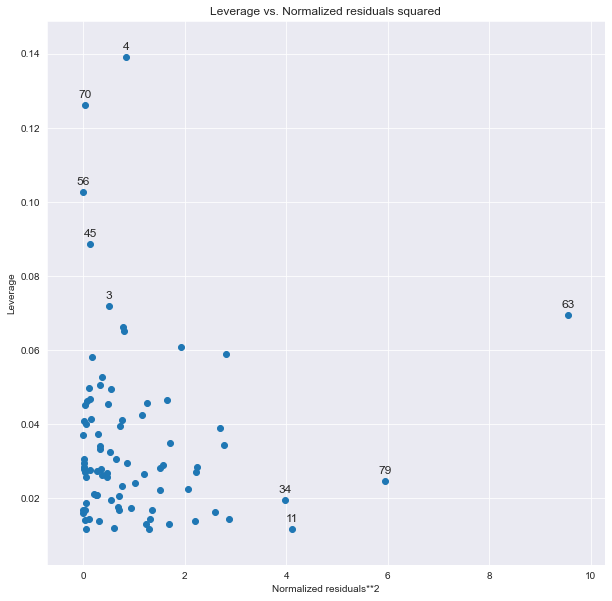

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
fit = plot_leverage_resid2(res, ax=ax)

**Multicollinearity**

In [88]:
 np.linalg.cond(res.model.exog)

702.179214549006

**Heteroskedasticity**

In [89]:
name = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier stat', 4.8932133740940245),
 ('p-value', 0.08658690502351918),
 ('f-value', 2.5037159462564724),
 ('f p-value', 0.08794028782672728)]

In [90]:
name = ['F stat', 'p-value']
test = sms.het_goldfeldquandt(res.resid, res.model.exog)
lzip(name, test)

[('F stat', 1.1002422436378152), ('p-value', 0.3820295068692507)]

**Linearity**

In [91]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(res)
lzip(name, test)

[('t value', -1.0796490077788925), ('p value', 0.2834639247556325)]

### 11 : Weighted Least Squares

In [92]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

np.random.seed(42)
%matplotlib inline

**WLS Estimation**
Fake data: Heteroscedascity of 2 groups

Assumptions:

1. Misspecification: true model will be quadratic, while ested model was linear
2. Ind noise/error term
3. two groups for error variance, low and high var groups

In [96]:
nsample = 50
x = np.linspace(0, 20, nsample) #random for 50 obs, start with 0 till 20
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6//10:]=3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]

**WLS knowing the true variance ratio of heteroscedasticity**

In [98]:
mod_wls = sm.WLS(y, X, weights=1./(w**2)) # wights is inverse of square of true varance

In [99]:
res_wls = mod_wls.fit()
res_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            WLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     348.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.24e-23
Time:                        12:42:33   Log-Likelihood:                -65.095
No. Observations:                  50   AIC:                             134.2
Df Residuals:                      48   BIC:                             138.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1590      0.189     27.363      0.000       4.780       5.538
x1             0.4447      0.024     18.654      0.000       0.397       0.493
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.076
Skew:                           0.353   Prob(JB):                        0.584
Kurtosis:                       2.862   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comparison : OLS vs WLS**

In [101]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[5.43617643 0.38762813]
[5.15904748 0.444728  ]


Compare WLS standard error to heteroskedasticy corrected OLS std errors

In [102]:
se = np.vstack([[res_wls.bse], [res_ols.bse], [res_ols.HC0_se], [res_ols.HC1_se], [res_ols.HC2_se],[res_ols.HC3_se] ])
se = np.round(se, 4)
colnames = ['x1', 'const']
rownames = ['WLS', 'OLS', 'OLS_HC0', 'OLS_HC1','OLS_HC2','OLS_HC3' ]
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1   const 
---------------------
WLS     0.1885 0.0238
OLS     0.2991 0.0258
OLS_HC0 0.2288 0.0271
OLS_HC1 0.2335 0.0277
OLS_HC2 0.2358 0.0279
OLS_HC3 0.2432 0.0287
---------------------


In [103]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb, X.T).T).sum(1) #T: Transpose
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)

In [104]:
#Draw Comparison between WLS and OLS
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

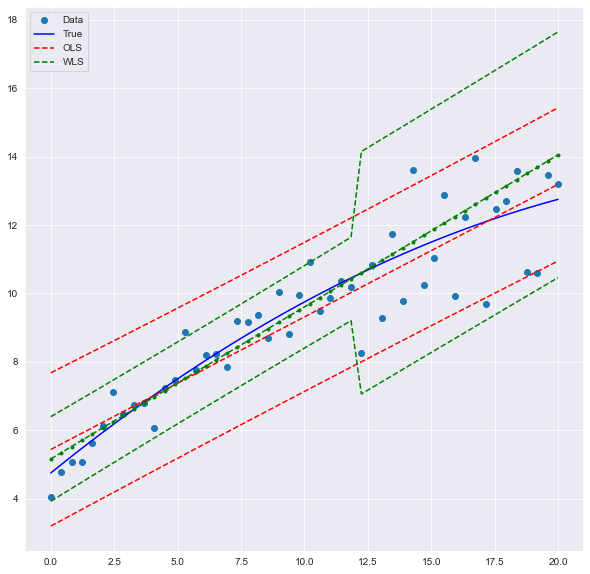

In [105]:
# Draw comparision between WLS and OLS
prstd, iv_1, iv_u = wls_prediction_std(res_wls)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_1, 'g--', label='WLS')
ax.plot(x, iv_u, 'g--')
ax.legend(loc="best");

### 12 : Linear Mixed Effects Models

In [106]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [107]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [130]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [108]:
model = smf.mixedlm("Weight~Time", data, groups=data["Pig"])
res = model.fit(method=["lbfgs"])
res.summary() #fixed effect

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [111]:
model_2 = smf.mixedlm("Weight~Time", data,groups=data['Pig'], re_formula="~Time")
res_2 = model_2.fit(method=["lbfgs"])
res_2.summary() #random effect s.t. Group X Time Covariant

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           
===========================================================

"""

In [112]:
# Porportion explained by Time (Group x Time Cov) /[(Group * Time)]^0.5
.294 / (19.503 * .416 )** .5 # Approx .1

0.10321669639698673

In [113]:
model_3 = smf.mixedlm("Weight~Time", data, groups=data['Pig'], re_formula="~Time")
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2), np.eye(2))
res_3 = model_3.fit(free=free, method=['lbfgs'])
res_3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0283    
Min. group size:   11       Log-Likelihood:      -2217.3481
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.554 28.388 0.000 14.652 16.825
Time              6.939    0.080 86.248 0.000  6.781  7.097
Group Var        19.837    1.571                           
Group x Time Cov  0.000    0.000                           
Time Var          0.423    0.033                           
===========================================================

"""

### Linear Mixed Effects Models Continued

In [114]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [115]:
data = sm.datasets.get_rdataset("Sitka", "MASS").data
endog = data['size']
data['Intercept'] = 1
exog = data[["Intercept", "Time"]]

In [117]:
model = sm.MixedLM(endog, exog, groups=data['tree'], exog_re=exog['Intercept'])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Log-Likelihood:     -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           
=======================================================

"""

In [118]:
exog_re = exog.copy()
model = sm.MixedLM(endog, exog, exog_re)
res = model.fit()
res.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization f

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    size      
No. Observations:    395        Method:                REML      
No. Groups:          2          Scale:                 0.0000    
Min. group size:     1          Log-Likelihood:        14354.3458
Max. group size:     1          Converged:             No        
Mean group size:     1.0                                         
-----------------------------------------------------------------
          Coef. Std.Err.          z           P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept 1.263    0.000  711121487601297.125 0.000  1.263  1.263
Time      0.021    0.000 1854466221324180.250 0.000  0.021  0.021
Group Var 0.000                                                  
=================================================================

"""

### 13 : Regression Plots with the Prestige Dataset

In [119]:
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [120]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [121]:
model = ols("prestige~income+education", data=prestige).fit()

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           8.65e-17
Time:                        13:29:01   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Influence Plots**

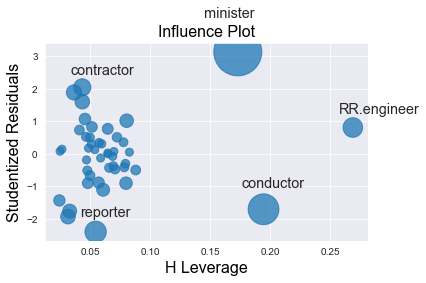

In [133]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1);

**Partial Regression Plot**

eval_env: 1


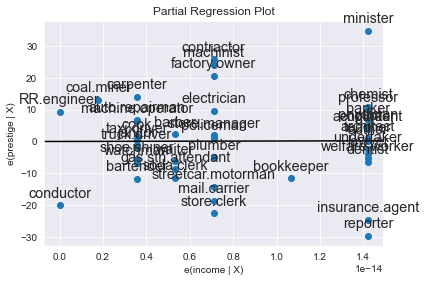

In [134]:
fig = sm.graphics.plot_partregress("prestige","income",["income","education"], data=prestige)
fig.tight_layout(pad=1.0)

eval_env: 1


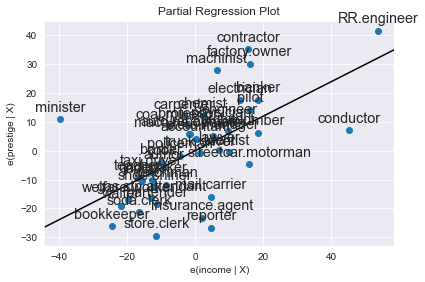

In [135]:
fig = sm.graphics.plot_partregress("prestige","income",["education"], data=prestige)
fig.tight_layout(pad=1.0)

In [136]:
subset = ~prestige.index.isin(["conductor","RR.engineer","minister"])
model2 = ols("prestige~income+education", data=prestige,subset=subset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.02e-18
Time:                        13:41:27   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.094     -13.760       1.125
income         0.9307      0.154      6.053      0.000       0.620       1.242
education      0.2846      0.121      2.345      0.024       0.039       0.530
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.802
Skew:                          -0.614   Prob(JB):                        0.246
Kurtosis:                       3.303   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1


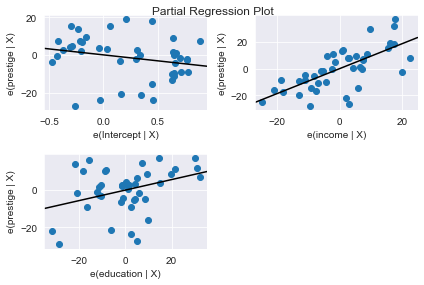

In [142]:
fig = sm.graphics.plot_partregress_grid(model2)

**Component-Component Plus Residual Plots**

### 14 : Interaction of Categorical Variables

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

In [150]:
np.random.seed(42)
weight = pd.Series(np.repeat(['low','high', 'low', 'high'], 15), name="weight")
intake = pd.Series(np.repeat(['low_carb','hi_carb'], 30), name="intake")
days = np.log(np.random.randint(1, 30, size=60))

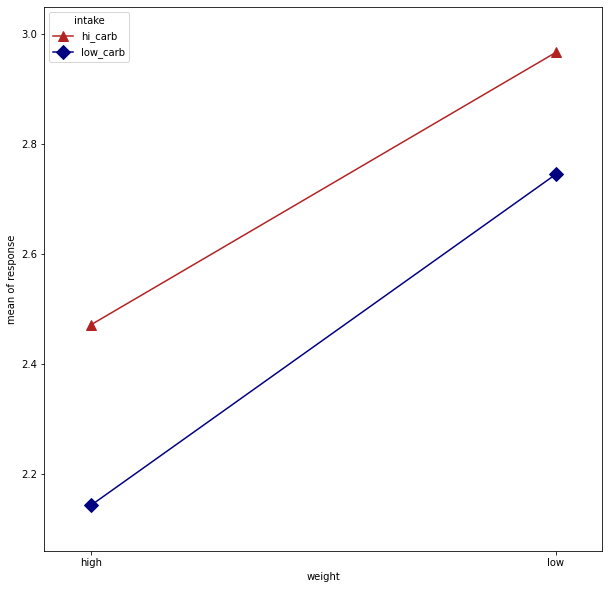

In [151]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = interaction_plot(
    x=weight,
    trace=intake,
    response=days,
    colors=['firebrick', 'navy'],
    markers=['^','D'],
    ms=10,
    ax=ax
)

Extra Examples: https://www.statsmodels.org/dev/examples/index.html